In [ ]:


!pip install librosa
!pip install pytube
!pip install librosa numpy
!pip install soundfile
!pip install pydub
!pip install resampy
!pip show resampy
!pip install tensorflow

Name: resampy
Version: 0.4.2
Summary: Efficient signal resampling
Home-page: https://github.com/bmcfee/resampy
Author: Brian McFee
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: c:\users\kiit\anaconda3\lib\site-packages
Requires: numba, numpy
Required-by: 


In [ ]:

import warnings

warnings.filterwarnings("ignore")
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pydub import AudioSegment
import csv
import os
%matplotlib inline

In [ ]:
input_audio_files = ["D:\RML\Research_Code\dog.wav",
                     "D:\RML\Research_Code\one.wav"]

for file in input_audio_files:

    data, sample_rate = librosa.load(file, sr=None)  # Setting sr=None returns the original sample rate

    print(f"The sample rate of {file} is: {sample_rate} Hz")


The sample rate of D:\RML\Research_Code\dog.wav is: 48000 Hz
The sample rate of D:\RML\Research_Code\one.wav is: 48000 Hz


In [ ]:
# Display the audio...............
from IPython.display import Audio


audio_path = input_audio_files[0]


Audio(audio_path)


In [ ]:

file_path = file_path = "D:/RML/Research_Code/UrbanSound8K/metadata/UrbanSound8K.csv"


df = pd.read_csv(file_path)

df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [6]:
filename='D:/RML/Research_Code/UrbanSound8K/audio/fold1/7383-3-0-1.wav'
filename1='D:/RML/Research_Code/UrbanSound8K/audio/fold1/15564-2-0-2.wav'

44100


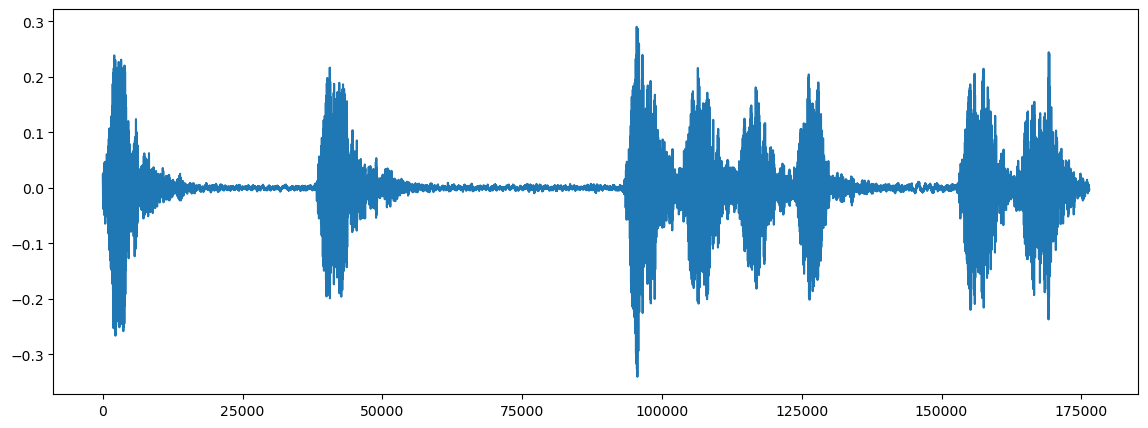

In [7]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename,sr=None)
plt.plot(data)
#librosa.display.waveplot(data,sr=sample_rate)    waveplot not availabe
ipd.Audio(filename)
print(sample_rate)

44100


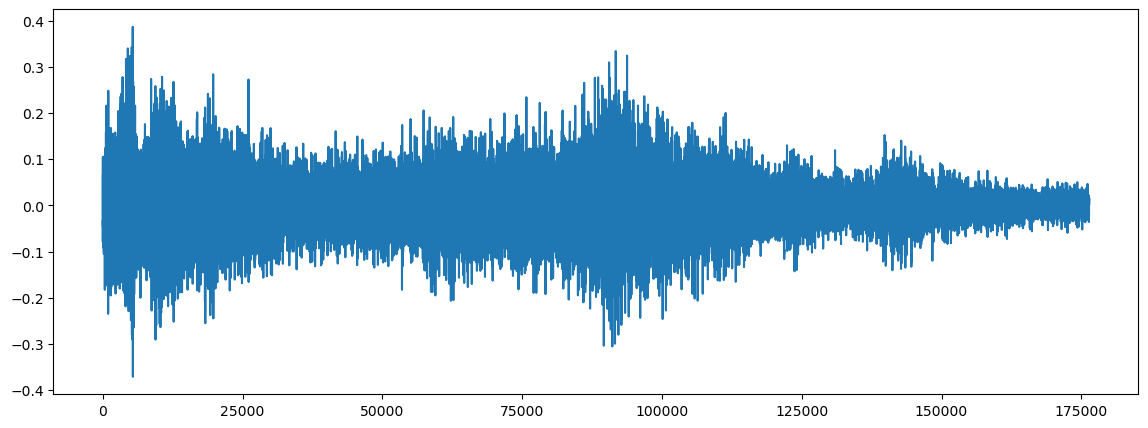

In [8]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename1,sr=None)
plt.plot(data)
#librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename1)
print(sample_rate)

In [9]:
### Check whether the dataset is imbalanced
df['classID'].value_counts()

3    1000
2    1000
0    1000
9    1000
5    1000
7    1000
4    1000
8     929
1     429
6     374
Name: classID, dtype: int64

In [10]:
df.value_counts()

slice_file_name    fsID    start       end         salience  fold  classID  class     
100032-3-0-0.wav   100032  0.000000    0.317551    1         5     3        dog_bark      1
24347-8-0-73.wav   24347   40.620371   44.620371   2         4     8        siren         1
24347-8-0-68.wav   24347   38.120371   42.120371   2         4     8        siren         1
24347-8-0-69.wav   24347   38.620371   42.620371   2         4     8        siren         1
24347-8-0-7.wav    24347   7.620371    11.620371   2         4     8        siren         1
                                                                                         ..
162134-7-10-0.wav  162134  178.959326  182.959326  1         10    7        jackhammer    1
162134-7-1-0.wav   162134  18.663755   22.396505   1         10    7        jackhammer    1
162134-7-0-2.wav   162134  2.333125    6.333125    1         10    7        jackhammer    1
162134-7-0-1.wav   162134  1.833125    5.833125    1         10    7        jackhamme

In [11]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='D:/RML/Research_Code/UrbanSound8K/audio/fold1/17913-4-1-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

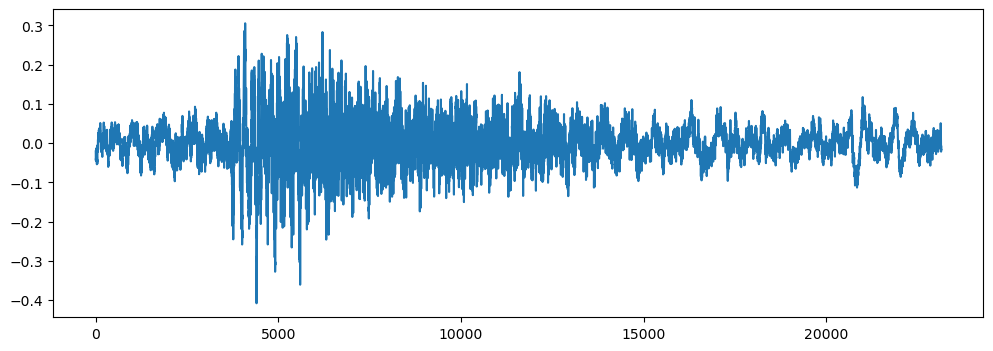

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [13]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path= 'D:/RML/Research_Code/UrbanSound8K/audio'
metadata=pd.read_csv('D:/RML/Research_Code/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:


import librosa
from sklearn.preprocessing import StandardScaler
import numpy as np

def features_extractor_standard(file, max_frames=400, n_mfcc=40):

    audio, sample_rate = librosa.load(file, sr=44100, res_type='kaiser_fast')


    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)


    if mfccs_features.shape[1] < max_frames:
        mfccs_features = np.pad(mfccs_features, ((0, 0), (0, max_frames - mfccs_features.shape[1])), mode='constant')
    else:
        mfccs_features = mfccs_features[:, :max_frames]


    scaler = StandardScaler()
    mfccs_scaled_features = scaler.fit_transform(mfccs_features)

    return mfccs_scaled_features



In [ ]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor_standard(file_name)
    extracted_features.append([data,final_class_labels])

8732it [06:41, 21.75it/s]


In [16]:
len(extracted_features)

8732

In [17]:
extracted_features[0]

[array([[-6.0051804 , -5.507225  , -4.8580503 , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.5457492 ,  2.5891504 ,  3.1856654 , ...,  0.        ,
          0.        ,  0.        ],
        [-0.15347151, -0.6584814 , -1.4117814 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.07233869,  0.21867411,  0.2425351 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.1894701 ,  0.2589383 ,  0.26829684, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.18778415,  0.17273435,  0.28566203, ...,  0.        ,
          0.        ,  0.        ]], dtype=float32),
 'dog_bark']

In [18]:
# Convert extracted_features to a DataFrame
df = pd.DataFrame(extracted_features, columns=['Feature', 'class'])

In [19]:
df.head(5)

,Feature,class
0,"[[-6.0051804, -5.507225, -4.8580503, -4.14925,...",dog_bark
1,"[[-6.079244, -5.971173, -5.872485, -5.867127, ...",children_playing
2,"[[-6.046803, -5.918717, -5.8346252, -5.875177,...",children_playing
3,"[[-5.837201, -5.800083, -5.7924314, -5.7579017...",children_playing
4,"[[-5.919988, -5.8032975, -5.7580466, -5.781482...",children_playing


In [20]:
df.dtypes

Feature    object
class      object
dtype: object

In [21]:
df['Feature'].shape

(8732,)

In [22]:
### Split the dataset into independent and dependent dataset
X=np.array(df['Feature'].tolist())
y=np.array(df['class'].tolist())

In [23]:
X.shape

(8732, 40, 400)

In [24]:
y.shape

(8732,)

In [25]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [26]:
y.shape

(8732, 10)

In [27]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
X_train.shape

(6985, 40, 400)

In [29]:
X_test.shape

(1747, 40, 400)

In [30]:
y_train.shape

(6985, 10)

In [31]:
y_test.shape

(1747, 10)

In [32]:
num_classes = len(df['class'].unique())
class_names =df['class'].unique()
epoch=100
patience=10
learning_rate=0.0001
length=40
extract_feature=400
k_size=3
p_size=2
L2_regularization=0.01
dropout=0.2
batch_size=32

In [33]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import os

In [ ]:
import os
import numpy as np
from datetime import datetime
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, Input
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Check and create the logs directory if it doesn't exist
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Create the 1D CNN model with a fixed batch size using the Input layer
model = Sequential([
    Input(batch_shape=(batch_size, length, extract_feature)),
    layers.Conv1D(64, kernel_size=k_size, activation='relu', use_bias=False),
    layers.MaxPooling1D(pool_size=p_size),
    layers.Conv1D(128, kernel_size=k_size, activation='relu'),
    layers.MaxPooling1D(pool_size=p_size),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(L2_regularization)),
    layers.Dropout(dropout),
    layers.Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up TensorBoard for each fold
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define early stopping with a large patience value
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
model.summary()

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epoch,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback, early_stopping]
)


_, accuracy = model.evaluate(X_test, y_test)

print(f'Accuracy: {accuracy * 100:.2f}%')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (32, 38, 64)              76800     
                                                                 
 max_pooling1d (MaxPooling1  (32, 19, 64)              0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (32, 17, 128)             24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (32, 8, 128)              0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (32, 1024)                0         
                                                                 
 dense (Dense)               (32, 128)                

219/219 [==============================] - 2s 10ms/step - loss: 0.3352 - accuracy: 0.9586 - val_loss: 0.4768 - val_accuracy: 0.9067
Epoch 41/100
219/219 [==============================] - 2s 10ms/step - loss: 0.3288 - accuracy: 0.9560 - val_loss: 0.4557 - val_accuracy: 0.9130
Epoch 42/100
219/219 [==============================] - 2s 10ms/step - loss: 0.3304 - accuracy: 0.9546 - val_loss: 0.4751 - val_accuracy: 0.9021
Epoch 43/100
219/219 [==============================] - 2s 10ms/step - loss: 0.3152 - accuracy: 0.9593 - val_loss: 0.4611 - val_accuracy: 0.9090
Epoch 44/100
219/219 [==============================] - 2s 10ms/step - loss: 0.3081 - accuracy: 0.9598 - val_loss: 0.4357 - val_accuracy: 0.9170
Epoch 45/100
219/219 [==============================] - 2s 10ms/step - loss: 0.2989 - accuracy: 0.9641 - val_loss: 0.4417 - val_accuracy: 0.9227
Epoch 46/100
219/219 [==============================] - 2s 10ms/step - loss: 0.2903 - accuracy: 0.9655 - val_loss: 0.4468 - val_accuracy: 0.915

In [ ]:

%load_ext tensorboard

%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 9584), started 15 days, 21:36:59 ago. (Use '!kill 9584' to kill it.)

55/55 [==============================] - 0s 4ms/step


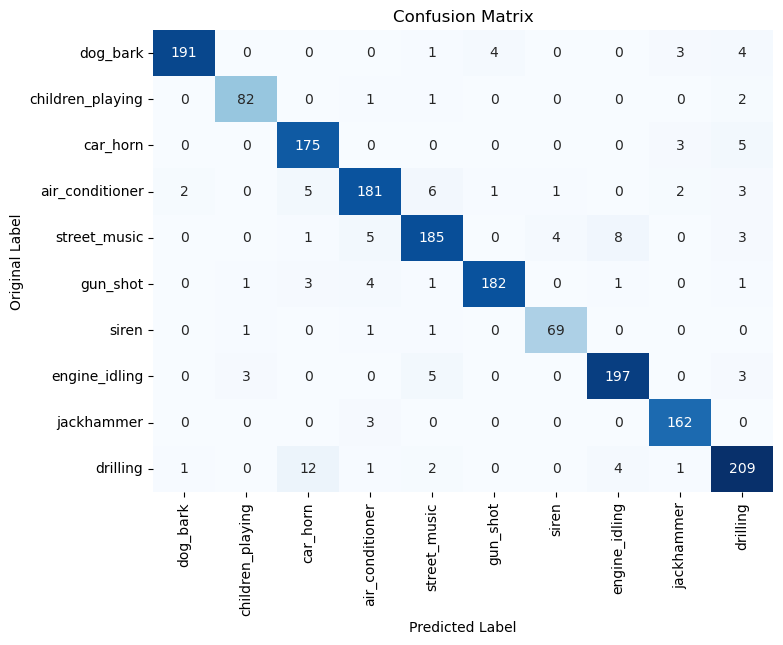

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)


conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)


plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Original Label')

# Show the plot
plt.show()


In [ ]:

def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: 
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

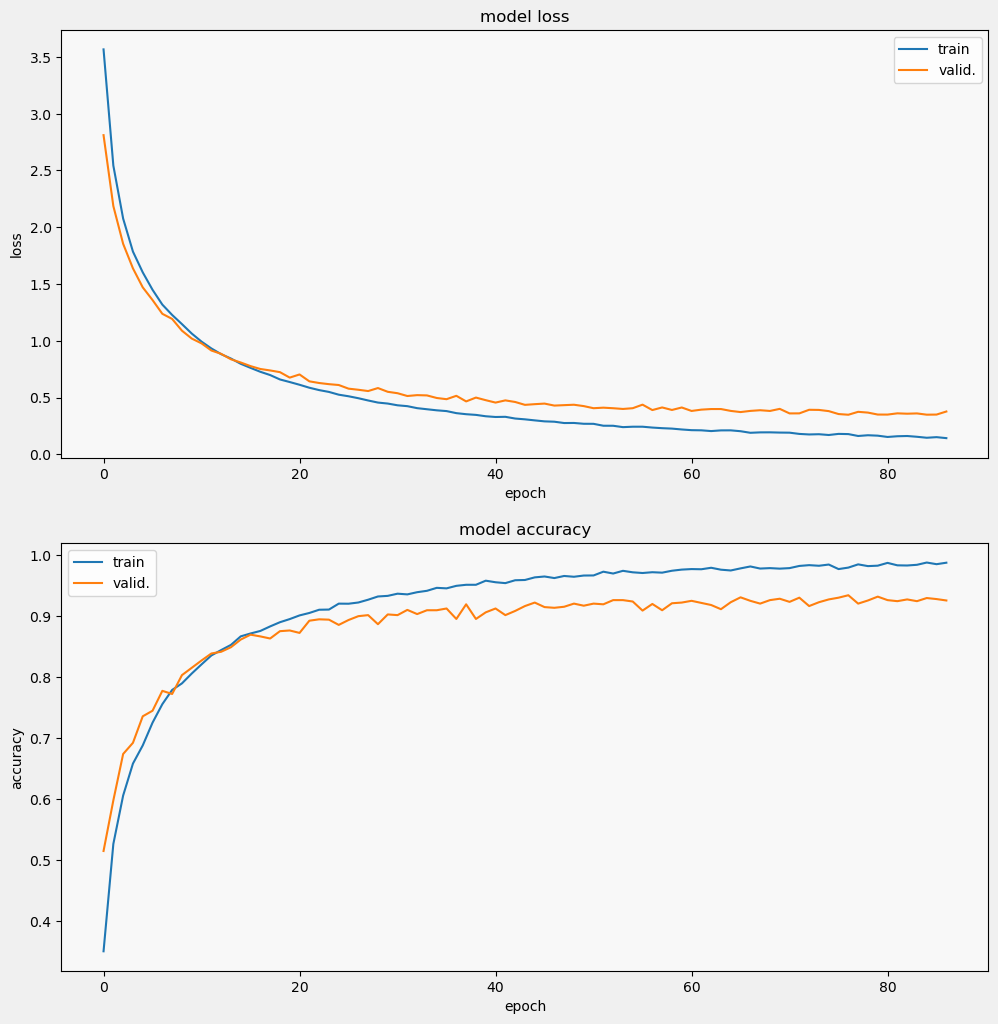

In [ ]:

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss',
    211,
)

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy',
    212,
)

In [39]:
accuracy

0.9347452521324158